In [1]:
# Impoting necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn import datasets

## Generating and Normalizing the Data

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators for train and test sets
# Rescaling images to normalize them
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images from directory in batches
Xtrain= train_datagen.flow_from_directory(
    directory='/Users/sukanya/Documents/Data Science Task/images/train',
    target_size=(48, 48),
    batch_size=100,
    color_mode='grayscale',
    class_mode='categorical'
)

Xtest = test_datagen.flow_from_directory(
    directory='/Users/sukanya/Documents/Data Science Task/images/validation',
    target_size=(48, 48),
    batch_size=100,
    color_mode='grayscale', 
    class_mode='categorical'
)

# Extracting labels
y_train = Xtrain.classes
y_test = Xtest.classes

Found 26921 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [31]:
y_train

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

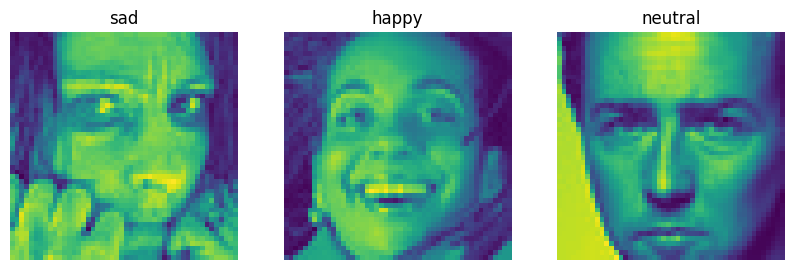

In [32]:
# Displaying few images from the dataset
x_batch, y_batch = Xtrain.next()

# Getting class labels
class_labels = Xtrain.class_indices

labels = dict((v,k) for k,v in class_labels.items())

# Ploting
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(labels[np.argmax(y_batch[i])])
    plt.axis('off')
plt.show()

In [37]:
from PIL import Image

# Open the image
img = Image.open('/Users/sukanya/Documents/Data Science Task/images/train/angry/35821.jpg')
# Get the dimensions
width, height = img.size
print("Width:", width)
print("Height:", height)

# Accessing pixels
pixels = img.load()
for y in range(height):
    for x in range(width):
        # Get pixel value at (x, y)
        pixel = pixels[x, y]
        # Do something with the pixel value



Width: 48
Height: 48


In [12]:
input_shape = (48, 48, 1)

## Defining and Training the model

#### I tried trainng various models, making changes in their architecture to get maximum possible accuracy, but unfortunatley I wasnt able to achieve a great accuracy

#### All the models that I trained are shown below

## Model 1
loss: 0.9596 - accuracy: 0.6303 - val_loss: 1.1600 - val_accuracy: 0.5757

In [57]:
model = Sequential()

model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(48, 48, 1), groups=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())

model.add(Conv2D(64, (2, 2), activation='relu', groups=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (2, 2), activation='relu', groups=1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

# Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(Xtrain, epochs=25, batch_size=50, validation_data=Xtest)

Epoch 1/25
270/270 [==============================] - 13s 47ms/step - loss: 1.2443 - accuracy: 0.5216 - val_loss: 1.2111 - val_accuracy: 0.5461
Epoch 2/25
270/270 [==============================] - 12s 44ms/step - loss: 1.2221 - accuracy: 0.5346 - val_loss: 1.2006 - val_accuracy: 0.5498
Epoch 3/25
270/270 [==============================] - 11s 40ms/step - loss: 1.2063 - accuracy: 0.5410 - val_loss: 1.2067 - val_accuracy: 0.5443
Epoch 4/25
270/270 [==============================] - 11s 40ms/step - loss: 1.1914 - accuracy: 0.5490 - val_loss: 1.1790 - val_accuracy: 0.5556
Epoch 5/25
270/270 [==============================] - 11s 41ms/step - loss: 1.1724 - accuracy: 0.5520 - val_loss: 1.1948 - val_accuracy: 0.5467
Epoch 6/25
270/270 [==============================] - 12s 45ms/step - loss: 1.1525 - accuracy: 0.5612 - val_loss: 1.1749 - val_accuracy: 0.5603
Epoch 7/25
270/270 [==============================] - 12s 44ms/step - loss: 1.1463 - accuracy: 0.5633 - val_loss: 1.1852 - val_accuracy:

# Model 2
loss: 0.8346 - accuracy: 0.6932 - val_loss: 1.2326 - val_accuracy: 0.5753

In [43]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

# Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Xtrain, epochs=10, batch_size=100, validation_data=Xtest)


Epoch 1/10
270/270 [==============================] - 70s 259ms/step - loss: 1.7851 - accuracy: 0.2605 - val_loss: 1.6727 - val_accuracy: 0.3280
Epoch 2/10
270/270 [==============================] - 72s 267ms/step - loss: 1.6094 - accuracy: 0.3615 - val_loss: 1.4724 - val_accuracy: 0.4244
Epoch 3/10
270/270 [==============================] - 71s 263ms/step - loss: 1.4472 - accuracy: 0.4409 - val_loss: 1.3672 - val_accuracy: 0.4833
Epoch 4/10
270/270 [==============================] - 71s 263ms/step - loss: 1.3320 - accuracy: 0.4927 - val_loss: 1.2568 - val_accuracy: 0.5262
Epoch 5/10
270/270 [==============================] - 71s 263ms/step - loss: 1.2378 - accuracy: 0.5319 - val_loss: 1.2119 - val_accuracy: 0.5446
Epoch 6/10
270/270 [==============================] - 69s 256ms/step - loss: 1.1542 - accuracy: 0.5651 - val_loss: 1.2017 - val_accuracy: 0.5512
Epoch 7/10
270/270 [==============================] - 70s 259ms/step - loss: 1.0809 - accuracy: 0.6004 - val_loss: 1.1702 - val_ac

# Model 3
loss: 1.4785 - accuracy: 0.4185 - val_loss: 1.3768 - val_accuracy: 0.4841

In [53]:
model = Sequential()

model.add(Conv2D(32, (2, 2),activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2, 2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

# Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Xtrain, epochs=10, batch_size=100, validation_data=Xtest)


Epoch 1/10
270/270 [==============================] - 10s 36ms/step - loss: 1.8892 - accuracy: 0.2449 - val_loss: 4.0189 - val_accuracy: 0.2511
Epoch 2/10
270/270 [==============================] - 9s 34ms/step - loss: 1.7414 - accuracy: 0.2801 - val_loss: 1.8626 - val_accuracy: 0.2884
Epoch 3/10
270/270 [==============================] - 10s 36ms/step - loss: 1.6857 - accuracy: 0.3136 - val_loss: 1.5513 - val_accuracy: 0.4083
Epoch 4/10
270/270 [==============================] - 9s 31ms/step - loss: 1.6335 - accuracy: 0.3395 - val_loss: 1.5884 - val_accuracy: 0.3892
Epoch 5/10
270/270 [==============================] - 8s 31ms/step - loss: 1.5874 - accuracy: 0.3596 - val_loss: 1.4752 - val_accuracy: 0.4464
Epoch 6/10
270/270 [==============================] - 9s 32ms/step - loss: 1.5611 - accuracy: 0.3762 - val_loss: 1.4468 - val_accuracy: 0.4577
Epoch 7/10
270/270 [==============================] - 8s 31ms/step - loss: 1.5383 - accuracy: 0.3867 - val_loss: 1.4696 - val_accuracy: 0.44

# Model 4
loss: 1.5300 - accuracy: 0.3958 - val_loss: 1.4655 - val_accuracy: 0.4363

In [54]:
model = Sequential()

model.add(Conv2D(32, (2, 2),activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (2, 2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (2, 2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

# Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Xtrain, epochs=10, batch_size=100, validation_data=Xtest)

Epoch 1/10
270/270 [==============================] - 8s 28ms/step - loss: 1.8625 - accuracy: 0.2276 - val_loss: 1.8611 - val_accuracy: 0.2583
Epoch 2/10
270/270 [==============================] - 7s 27ms/step - loss: 1.7779 - accuracy: 0.2648 - val_loss: 1.7589 - val_accuracy: 0.2836
Epoch 3/10
270/270 [==============================] - 7s 27ms/step - loss: 1.7225 - accuracy: 0.2817 - val_loss: 1.6484 - val_accuracy: 0.3511
Epoch 4/10
270/270 [==============================] - 7s 27ms/step - loss: 1.6753 - accuracy: 0.3057 - val_loss: 1.6053 - val_accuracy: 0.3940
Epoch 5/10
270/270 [==============================] - 7s 26ms/step - loss: 1.6369 - accuracy: 0.3321 - val_loss: 1.6514 - val_accuracy: 0.3409
Epoch 6/10
270/270 [==============================] - 7s 28ms/step - loss: 1.6087 - accuracy: 0.3537 - val_loss: 1.4996 - val_accuracy: 0.4175
Epoch 7/10
270/270 [==============================] - 7s 25ms/step - loss: 1.5872 - accuracy: 0.3648 - val_loss: 1.4665 - val_accuracy: 0.4479

# Model 5
loss: 1.0552 - accuracy: 0.5996 - val_loss: 1.2539 - val_accuracy: 0.5385

In [56]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))

# Compiling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(Xtrain, epochs=10, batch_size=100, validation_data=Xtest)

Epoch 1/10
270/270 [==============================] - 98s 362ms/step - loss: 1.8143 - accuracy: 0.2523 - val_loss: 1.8111 - val_accuracy: 0.2583
Epoch 2/10
270/270 [==============================] - 98s 363ms/step - loss: 1.8047 - accuracy: 0.2551 - val_loss: 1.8070 - val_accuracy: 0.2583
Epoch 3/10
270/270 [==============================] - 100s 369ms/step - loss: 1.7287 - accuracy: 0.2908 - val_loss: 1.6190 - val_accuracy: 0.3549
Epoch 4/10
270/270 [==============================] - 99s 367ms/step - loss: 1.5590 - accuracy: 0.3843 - val_loss: 1.5197 - val_accuracy: 0.4108
Epoch 5/10
270/270 [==============================] - 93s 345ms/step - loss: 1.4455 - accuracy: 0.4385 - val_loss: 1.4021 - val_accuracy: 0.4591
Epoch 6/10
270/270 [==============================] - 95s 353ms/step - loss: 1.3442 - accuracy: 0.4814 - val_loss: 1.3260 - val_accuracy: 0.4866
Epoch 7/10
270/270 [==============================] - 94s 346ms/step - loss: 1.2638 - accuracy: 0.5158 - val_loss: 1.2793 - val_a

## The model with the best accuracy is Model 2:
- accuracy: 0.6932 
- loss: 0.8346
- val_accuracy: 0.5753
- val_loss: 1.2326